In [24]:
import numpy as np
from matplotlib import pyplot as plt
import padasip as pa
from scipy import fftpack
import processing_signals as ps

# plt.figure(figsize=(10, 7))

In [25]:
regexp = r'[+-]?\d+\.?\d*'
BP1 = np.fromregex('BP1.lcn', regexp, [('num', np.float64)])['num']
BP2 = np.fromregex('BP2.lcn', regexp, [('num', np.float64)])['num']
OPERATOR = np.fromregex('OPERATOR.lcn', regexp, [('num', np.float64)])['num']

print(BP1.size, BP2.size, OPERATOR.size)

501 501 1025


Моделируем входной и выходной 2d сигнал на адаптивный фильтр

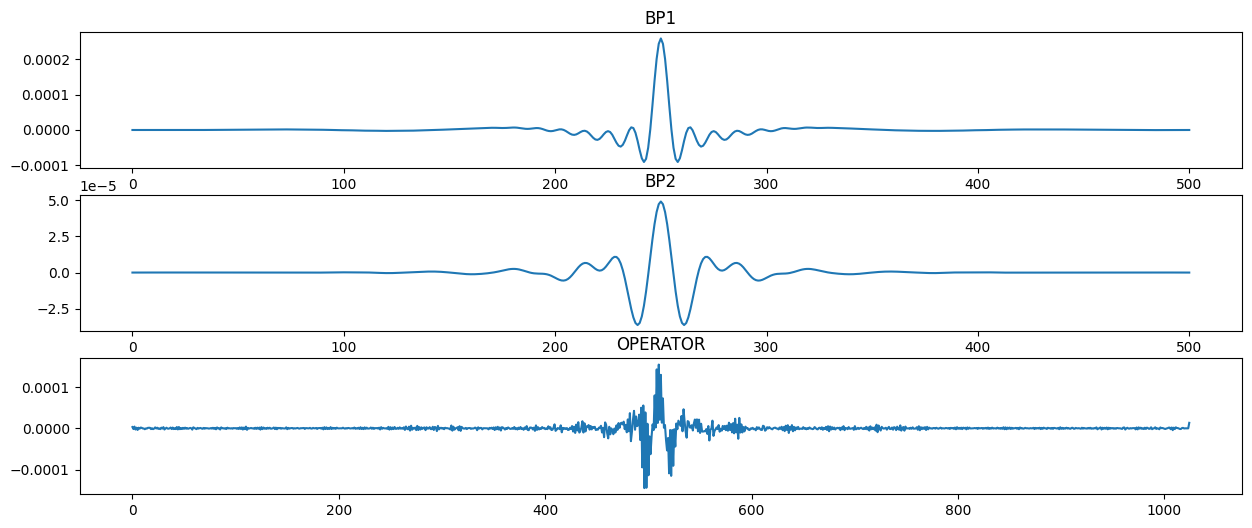

In [26]:
plt.figure(figsize=(15, 6))

plt.subplot(311)
plt.plot(BP1)
plt.title("BP1")

plt.subplot(312)
plt.plot(BP2)
plt.title("BP2")

plt.subplot(313)
plt.plot(OPERATOR)
plt.title("OPERATOR")
plt.show()

(501,) (1025,)


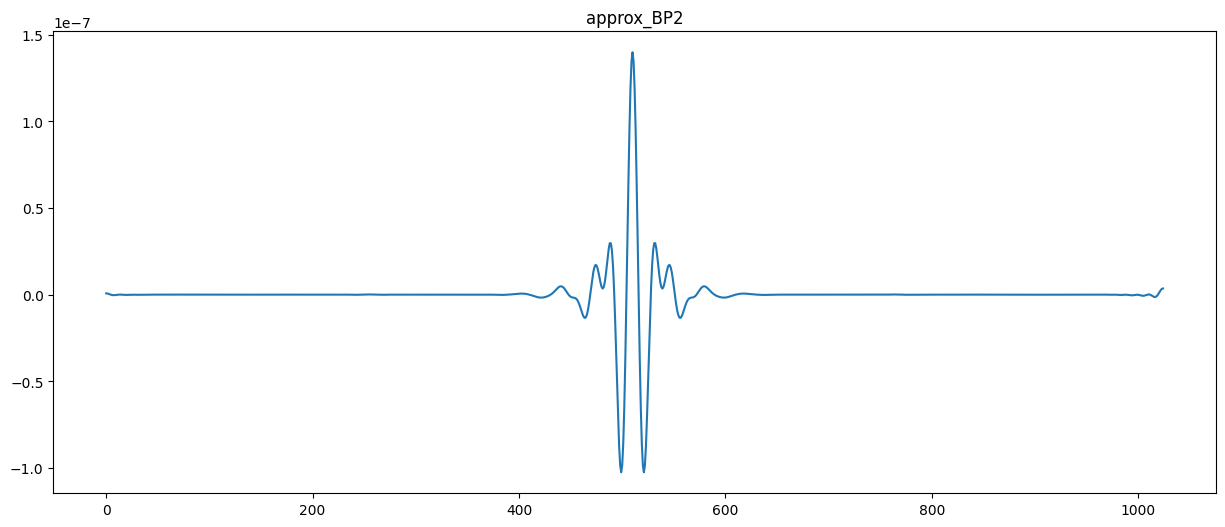

In [27]:
approx_BP2 = ps.processing_of_signal(BP1, OPERATOR[::])

plt.figure(figsize=(15, 6))

# plt.plot(BP2)
plt.plot(approx_BP2)
plt.title("approx_BP2")

plt.show()

In [28]:
approx_weights_nlms = ps.fitting_of_NLMS(BP1, BP2, 10, 0.5, 0.001)
print(approx_weights_nlms)

[-4.87105445e-05 -3.68877775e-05 -2.11747098e-05 -2.71734305e-06
  1.70075135e-05  3.63313059e-05  5.35587112e-05  6.71404128e-05
  7.58342162e-05  7.88360374e-05]


In [29]:
approx_weights_rls = ps.RLS(BP1, BP2, 10, 0.9).flatten()
print(approx_weights_rls)

[  8.81109438 -17.03129521 -14.8577938   44.41407528  -5.37317976
 -19.41122353 -27.52606947  49.85922475 -17.15677644  -1.76596338]


(501,) (10,)
(501,) (10,)


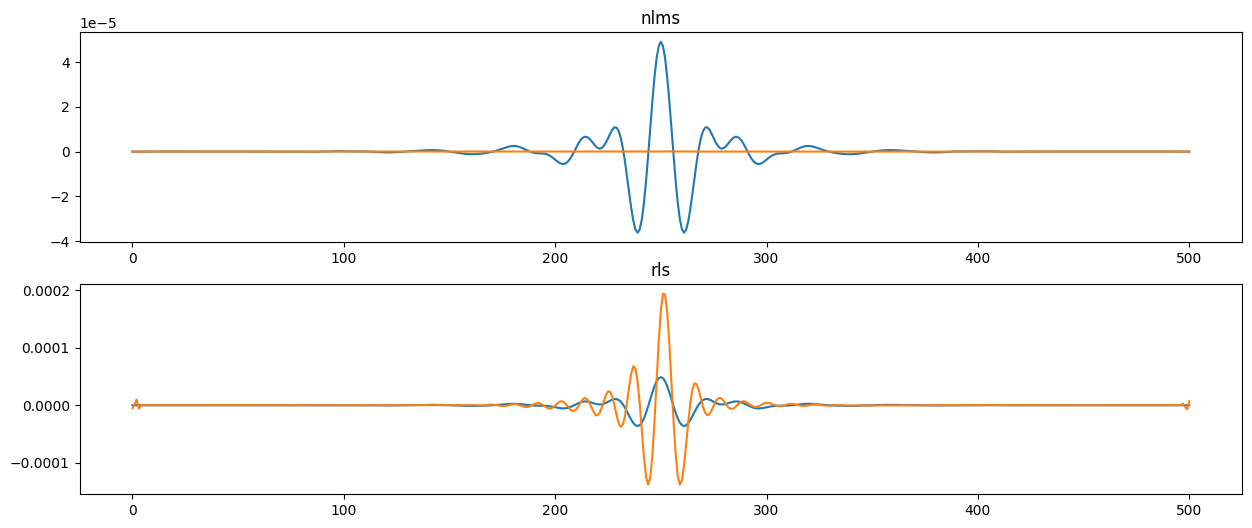

In [30]:
approx_BP2_nlms = ps.processing_of_signal(BP1, approx_weights_nlms)
approx_BP2_rls = ps.processing_of_signal(BP1, approx_weights_rls)

plt.figure(figsize=(15, 6))

plt.subplot(211)
plt.plot(BP2)
plt.plot(approx_BP2_nlms)
plt.title("nlms")

plt.subplot(212)
plt.plot(BP2)
plt.plot(approx_BP2_rls)
plt.title("rls")

# plt.subplot(211)
# plt.plot(BP1)
# plt.title("модель шума")

# plt.subplot(212)
# plt.plot(BP2)
# plt.title("реальный шум")

plt.show()

# Padasip

In [31]:
number_of_weights_p_nlms = 10
number_of_weights_p_rls = 10

In [32]:
first_input_1d_nlms = pa.input_from_history(BP1, number_of_weights_p_nlms)
first_input_1d_rls = pa.input_from_history(BP1, number_of_weights_p_rls)
second_input_1d = BP2

In [33]:
f = pa.filters.FilterNLMS(n=number_of_weights_p_nlms, mu=2*0.5, eps=0, w="zeros")
y, e, w = f.run(second_input_1d[:-(number_of_weights_p_nlms-1)], first_input_1d_nlms)

approx_weights_p_nlms = w[-1]
print(approx_weights_p_nlms)

[ 0.06543479 -0.24915505 -0.33311097 -0.21720172  0.0108293   0.23994551
  0.37147518  0.346295    0.15691187 -0.15687367]


In [34]:
f = pa.filters.FilterRLS(n=number_of_weights_p_rls, mu=0.9, w="zeros")
y, e, w = f.run(second_input_1d[:-(number_of_weights_p_rls-1)], first_input_1d_rls)

approx_weights_p_rls = w[-1]
print(approx_weights_p_rls)

[-4.83060957  9.24679189  0.69395244 -5.4765054  -7.56230683  6.43683429
  7.15268108 -1.3641519  -9.53807463  5.22858926]


(501,) (10,)
(501,) (10,)


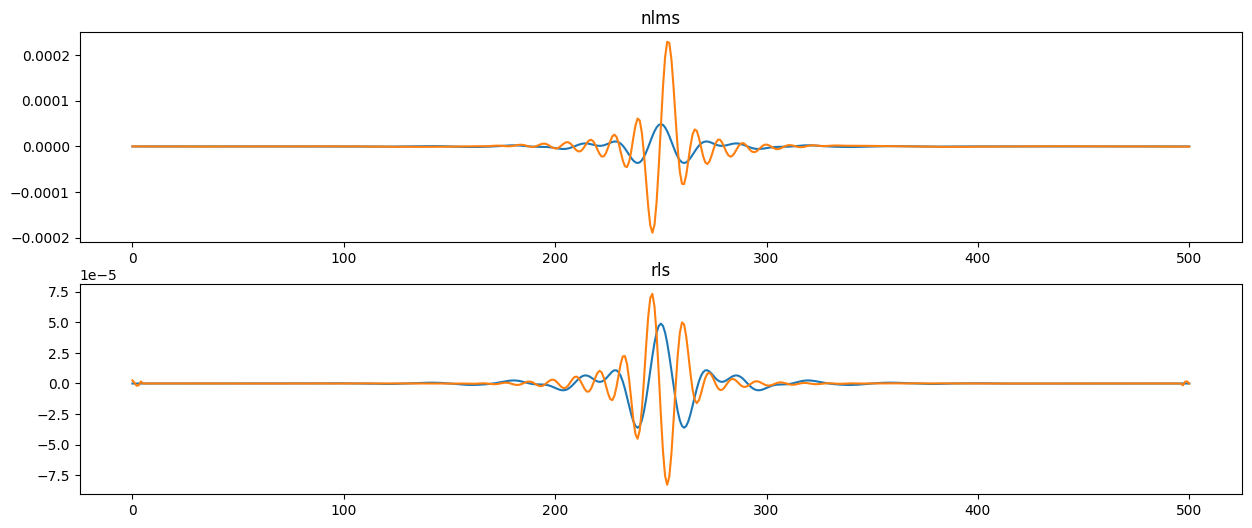

In [35]:
approx_BP2_p_nlms = ps.processing_of_signal(BP1, approx_weights_p_nlms)
approx_BP2_p_rls = ps.processing_of_signal(BP1, approx_weights_p_rls)

plt.figure(figsize=(15, 6))

plt.subplot(211)
plt.plot(BP2)
plt.plot(approx_BP2_p_nlms)
plt.title("nlms")

plt.subplot(212)
plt.plot(BP2)
plt.plot(approx_BP2_p_rls)
plt.title("rls")

plt.show()

In [36]:
# print(f"MSE = {ps.MSE(BP2, approx_BP2):.3e}")
# print(f"ME = {ps.ME(BP2, approx_BP2):.3e}")
print("My NLMS")
print(f"MSE = {ps.MSE(BP2, approx_BP2_nlms):.3e}")
print(f"ME = {ps.ME(BP2, approx_BP2_nlms):.3e}")
print("Padasip NLMS")
print(f"MSE = {ps.MSE(BP2, approx_BP2_p_nlms):.3e}")
print(f"ME = {ps.ME(BP2, approx_BP2_p_nlms):.3e}")
print("My RLS")
print(f"MSE = {ps.MSE(BP2, approx_BP2_rls):.3e}")
print(f"ME = {ps.ME(BP2,approx_BP2_rls):.3e}")
print("Padasip RLS")
print(f"MSE = {ps.MSE(BP2, approx_BP2_p_rls):.3e}")
print(f"ME = {ps.ME(BP2, approx_BP2_p_rls):.3e}")

My NLMS
MSE = 6.158e-11
ME = 2.684e-06
Padasip NLMS
MSE = 8.093e-10
ME = 7.933e-06
My RLS
MSE = 5.121e-10
ME = 6.847e-06
Padasip RLS
MSE = 2.226e-10
ME = 4.225e-06
